In [85]:
import pandas as pd
df=pd.read_csv('heart_2020_cleaned.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [87]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

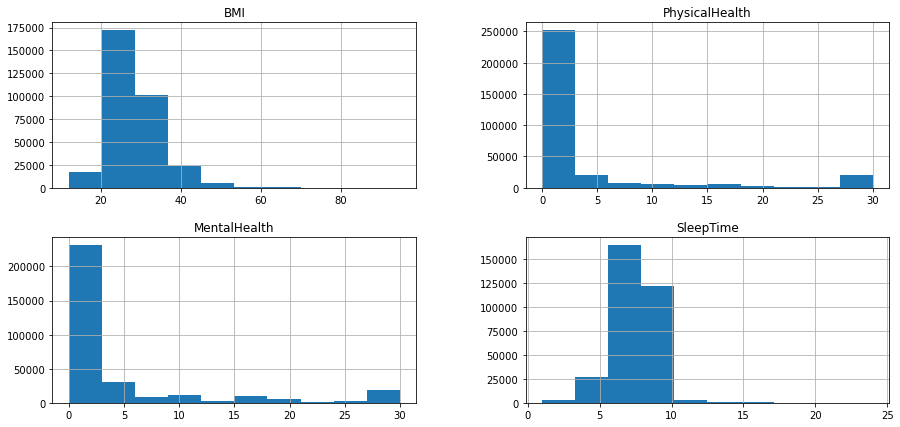

In [90]:
df.hist(figsize=(15,7)) #histogram representation

In [91]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [92]:
count1=df.HeartDisease.value_counts() 
count1

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:>

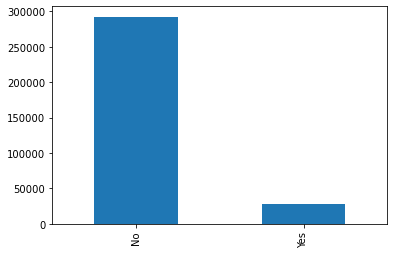

In [93]:
count1.plot(kind='bar')

In [94]:
df.isnull().sum()#no null values 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

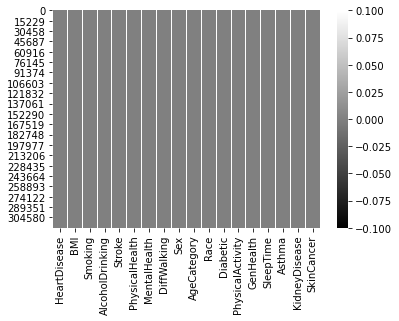

In [95]:
sns.heatmap(df.isnull(),cmap='gray')  #to visualise null data

<AxesSubplot:xlabel='HeartDisease', ylabel='SleepTime'>

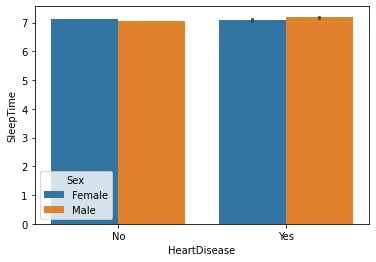

In [96]:
sns.barplot(data=df,x='HeartDisease',y='SleepTime',hue='Sex')

In [97]:
df['Sex'].nunique()

2

In [98]:
temp=pd.get_dummies(df.Sex)
temp

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
319790,0,1
319791,0,1
319792,1,0
319793,1,0


In [99]:
new=pd.concat([df,temp],axis=1)
new.drop(['Sex'],inplace=True,axis=1)
new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Female,Male
0,No,16.60,Yes,No,No,3.0,30.0,No,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,1,0
1,No,20.34,No,No,Yes,0.0,0.0,No,80 or older,White,No,Yes,Very good,7.0,No,No,No,1,0
2,No,26.58,Yes,No,No,20.0,30.0,No,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0,1
3,No,24.21,No,No,No,0.0,0.0,No,75-79,White,No,No,Good,6.0,No,No,Yes,1,0
4,No,23.71,No,No,No,28.0,0.0,Yes,40-44,White,No,Yes,Very good,8.0,No,No,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,0,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,0,1
319792,No,24.24,No,No,No,0.0,0.0,No,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,1,0
319793,No,32.81,No,No,No,0.0,0.0,No,25-29,Hispanic,No,No,Good,12.0,No,No,No,1,0


In [100]:
new['Race'].nunique()

6

In [101]:
temp=pd.get_dummies(new.Race)
temp

,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
319790,0,0,0,1,0,0
319791,0,0,0,1,0,0
319792,0,0,0,1,0,0
319793,0,0,0,1,0,0


In [102]:
new=pd.concat([new,temp],axis=1)
new.drop(['Race'],inplace=True,axis=1)
new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,No,16.60,Yes,No,No,3.0,30.0,No,55-59,Yes,...,No,Yes,1,0,0,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,80 or older,No,...,No,No,1,0,0,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,65-69,Yes,...,No,No,0,1,0,0,0,0,0,1
3,No,24.21,No,No,No,0.0,0.0,No,75-79,No,...,No,Yes,1,0,0,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,40-44,No,...,No,No,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,60-64,Yes,...,No,No,0,1,0,0,0,1,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,35-39,No,...,No,No,0,1,0,0,0,1,0,0
319792,No,24.24,No,No,No,0.0,0.0,No,45-49,No,...,No,No,1,0,0,0,0,1,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,25-29,No,...,No,No,1,0,0,0,0,1,0,0


In [103]:
new['GenHealth'].nunique()

5

In [104]:
temp=pd.get_dummies(new.GenHealth)
temp

,Excellent,Fair,Good,Poor,Very good
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
319790,0,1,0,0,0
319791,0,0,0,0,1
319792,0,0,1,0,0
319793,0,0,1,0,0


In [105]:
new=pd.concat([new,temp],axis=1)
new.drop(['GenHealth'],inplace=True,axis=1)
new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,Asian,Black,Hispanic,Other,White,Excellent,Fair,Good,Poor,Very good
0,No,16.60,Yes,No,No,3.0,30.0,No,55-59,Yes,...,0,0,0,0,1,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,80 or older,No,...,0,0,0,0,1,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,65-69,Yes,...,0,0,0,0,1,0,1,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,75-79,No,...,0,0,0,0,1,0,0,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,40-44,No,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,60-64,Yes,...,0,0,1,0,0,0,1,0,0,0
319791,No,29.84,Yes,No,No,0.0,0.0,No,35-39,No,...,0,0,1,0,0,0,0,0,0,1
319792,No,24.24,No,No,No,0.0,0.0,No,45-49,No,...,0,0,1,0,0,0,0,1,0,0
319793,No,32.81,No,No,No,0.0,0.0,No,25-29,No,...,0,0,1,0,0,0,0,1,0,0


In [109]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  object 
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  object 
 3   AlcoholDrinking                 319795 non-null  object 
 4   Stroke                          319795 non-null  object 
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  object 
 8   Diabetic                        319795 non-null  object 
 9   PhysicalActivity                319795 non-null  object 
 10  SleepTime                       319795 non-null  float64
 11  Asthma                          319795 non-null  object 
 12  KidneyDisease   

In [108]:
new.drop(columns='AgeCategory',inplace=True)

In [110]:
new.HeartDisease.replace(('Yes','No'),(1,0),inplace=True)

In [111]:
new.AlcoholDrinking.replace(('Yes','No'),(1,0),inplace=True)

In [112]:
new.Smoking.replace(('Yes','No'),(1,0),inplace=True)

In [113]:
new.Stroke.replace(('Yes','No'),(1,0),inplace=True)

In [114]:
new.DiffWalking.replace(('Yes','No'),(1,0),inplace=True)

In [115]:
new.Diabetic.replace(('Yes','No'),(1,0),inplace=True)

In [116]:
new.PhysicalActivity.replace(('Yes','No'),(1,0),inplace=True)

In [117]:
new.Asthma.replace(('Yes','No'),(1,0),inplace=True)

In [118]:
new.KidneyDisease.replace(('Yes','No'),(1,0),inplace=True)

In [119]:
new.SkinCancer.replace(('Yes','No'),(1,0),inplace=True)

In [120]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  int64  
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  int64  
 3   AlcoholDrinking                 319795 non-null  int64  
 4   Stroke                          319795 non-null  int64  
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  int64  
 8   Diabetic                        319795 non-null  object 
 9   PhysicalActivity                319795 non-null  int64  
 10  SleepTime                       319795 non-null  float64
 11  Asthma                          319795 non-null  int64  
 12  KidneyDisease   

In [121]:
target=new['HeartDisease']
features=new.drop(['HeartDisease','Diabetic','MentalHealth'],axis=1)

In [122]:
x=features
y=target

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [124]:
print(x_train.shape)#training data
print(y_train.shape)

(239846, 24)
(239846,)


In [125]:
print(x_test.shape)#testing data
print(y_test.shape)

(79949, 24)
(79949,)


In [126]:
from sklearn.linear_model import LinearRegression  #linear regression model
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [127]:
y_pred=LR.predict(x_test)
y_pred#predicted output

array([0.11535791, 0.03613214, 0.03503101, ..., 0.1174132 , 0.08780846,
       0.03960627])

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred))

0.2623728773228027

In [129]:
from sklearn.metrics import r2_score #r2 value
r2=r2_score(y_test,y_pred)
r2

0.11681401932592705

In [130]:
#from sklearn.tree import DecisionTreeRegressor
#reg=DecisionTreeRegressor()
#reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [131]:
#y_pred=reg.predict(x_test)
#y_pred#predicted output

array([1., 0., 0., ..., 0., 0., 0.])

In [132]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred)
#import numpy as np
#np.sqrt(mean_squared_error(y_test,y_pred))

0.3631584351608651

In [133]:
#from sklearn.metrics import r2_score #r2 value
#r2=r2_score(y_test,y_pred)
#r2

-0.6920241708174002

In [135]:
df2=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
df2

,Actual values,Predicted values
126167,0,1.000000
207506,0,0.000000
274544,0,0.000000
121049,0,0.057143
260961,0,0.000000
...,...,...
192652,0,0.250000
213635,0,0.000000
248840,0,0.000000
19492,0,0.000000


In [136]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BMI                             319795 non-null  float64
 1   Smoking                         319795 non-null  int64  
 2   AlcoholDrinking                 319795 non-null  int64  
 3   Stroke                          319795 non-null  int64  
 4   PhysicalHealth                  319795 non-null  float64
 5   DiffWalking                     319795 non-null  int64  
 6   PhysicalActivity                319795 non-null  int64  
 7   SleepTime                       319795 non-null  float64
 8   Asthma                          319795 non-null  int64  
 9   KidneyDisease                   319795 non-null  int64  
 10  SkinCancer                      319795 non-null  int64  
 11  Female                          319795 non-null  uint8  
 12  Male            

In [137]:
import joblib 
joblib.dump(LR,'heartdisease_model') #creating a file for the fbprophet model for potato price forecasting 

['heartdisease_model']

In [138]:
new.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Asian,Black,Hispanic,Other,White,Excellent,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [139]:
features.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,...,Asian,Black,Hispanic,Other,White,Excellent,Fair,Good,Poor,Very good
0,16.60,1,0,0,3.0,0,1,5.0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,20.34,0,0,1,0.0,0,1,7.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,26.58,1,0,0,20.0,0,1,8.0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,24.21,0,0,0,0.0,0,0,6.0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,23.71,0,0,0,28.0,1,1,8.0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [140]:
features.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'DiffWalking', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Female', 'Male',
       'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
       'White', 'Excellent', 'Fair', 'Good', 'Poor', 'Very good'],
      dtype='object')